In [1]:
# necessary imports  
  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px  
  
import warnings  
warnings.filterwarnings('ignore')  
  
plt.style.use('ggplot')  

In [2]:
df=pd.read_csv('insurance_claimss.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
# some missing values are denoted by '0', so let's replace missing values with np.nan  
df.replace('?', np.nan, inplace = True)
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [4]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

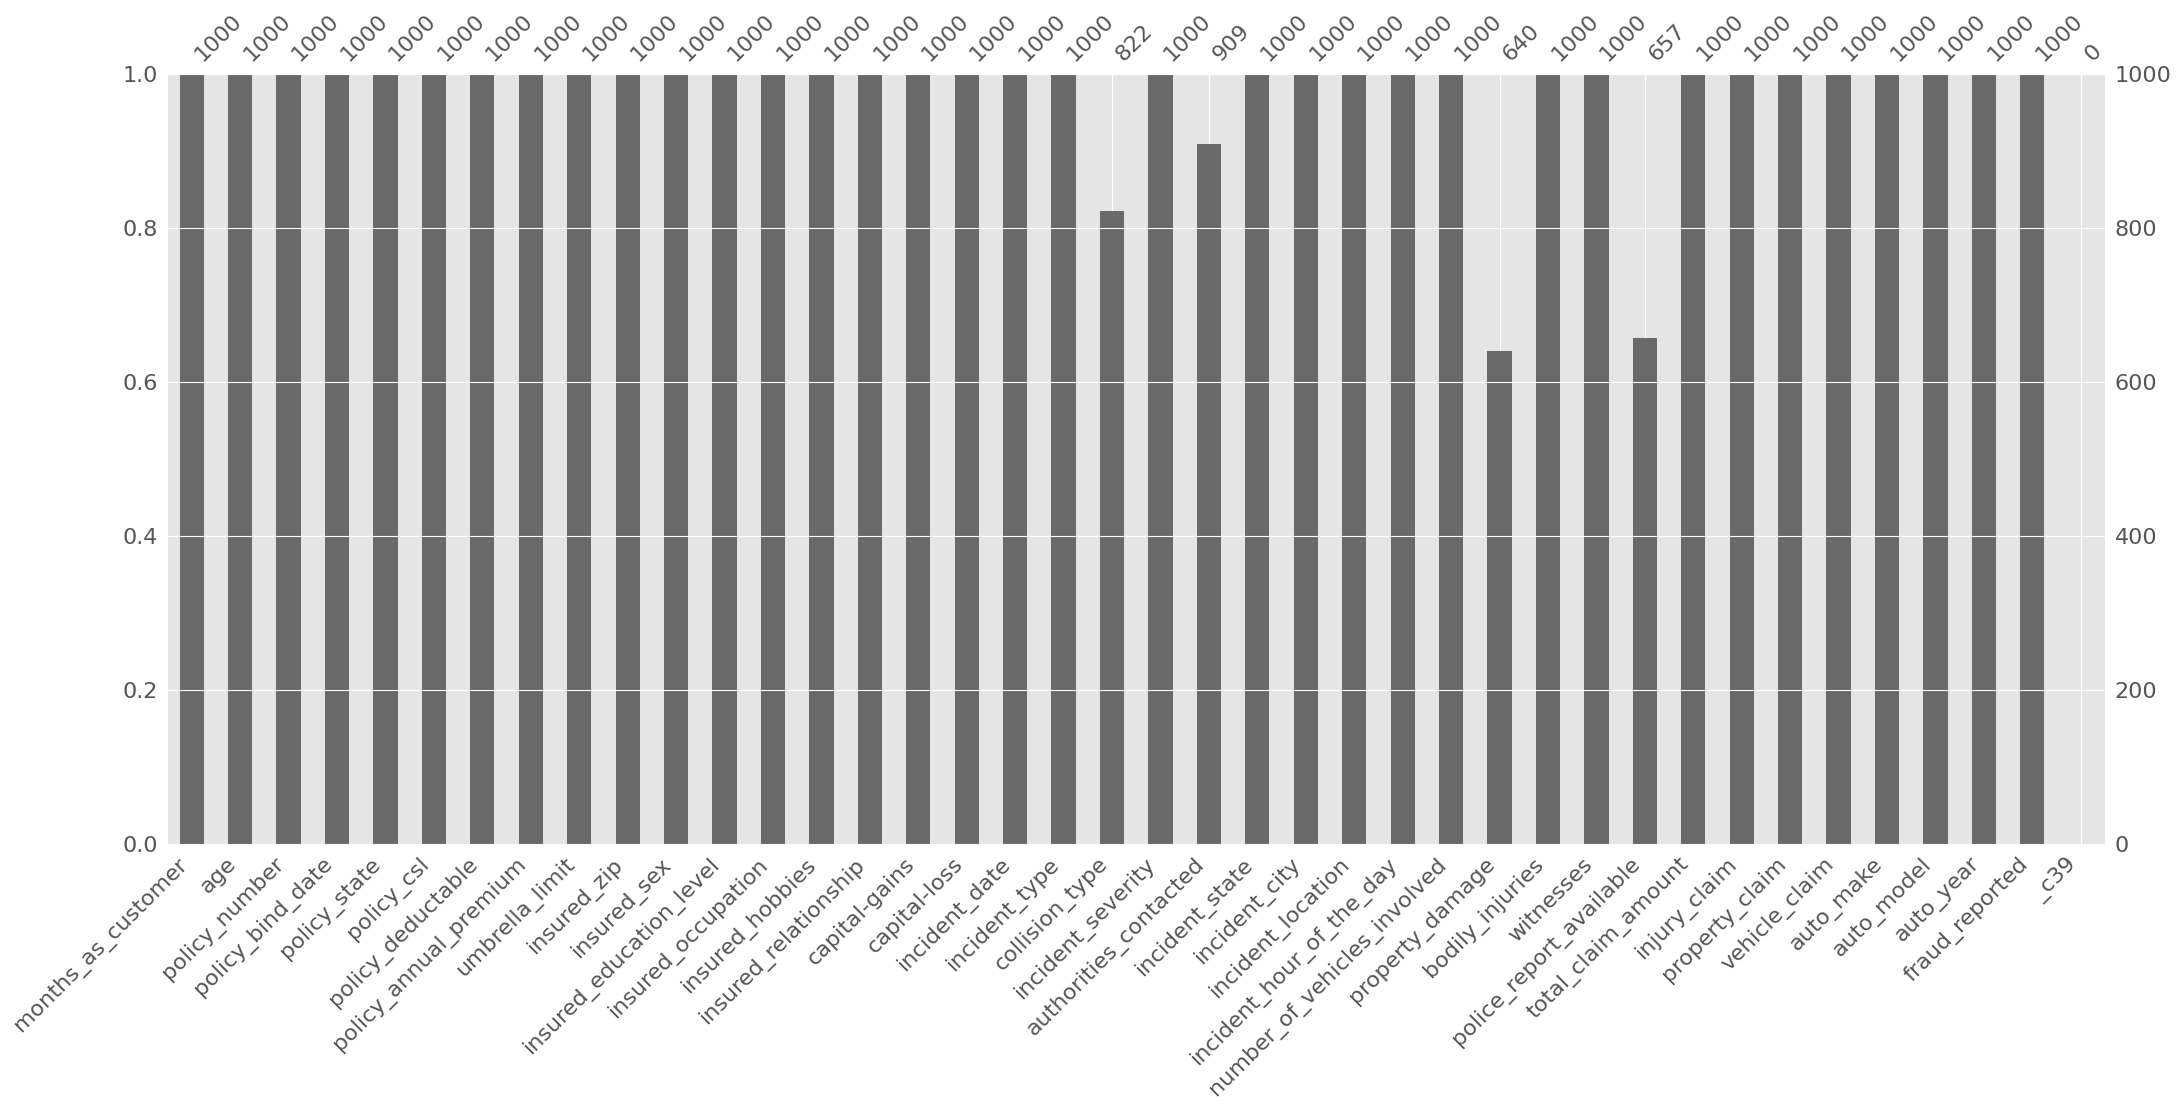

In [5]:
import missingno as msno
msno.bar(df)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [8]:
to_drop = ['_c39']  
df.drop(to_drop, inplace = True, axis = 1)  
df.head() 

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
df.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

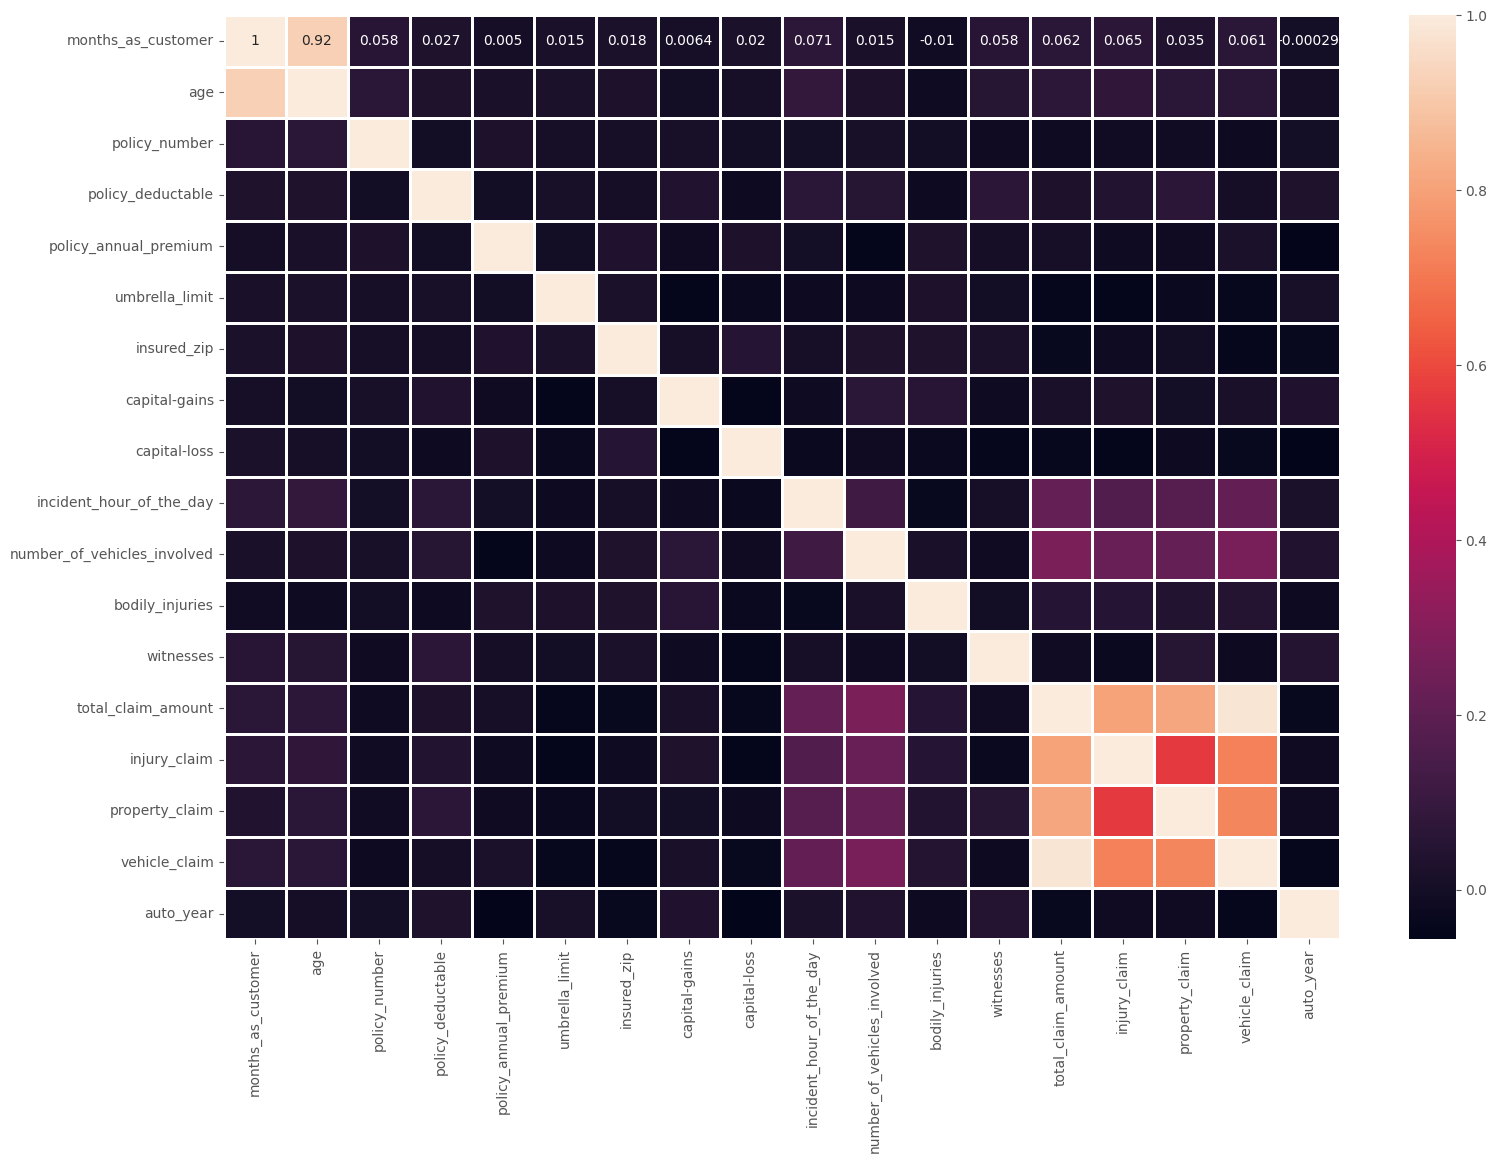

In [10]:
# Exclude non-numeric columns (like 'policy bind date') from correlation calculation
numeric_data = df.select_dtypes (include=[np.number])
# calculate correlation matrix 
corr = numeric_data.corr()
# Plot heatmap with Larger font size for annotations 
plt.figure(figsize=(18, 12))
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1, annot_kws={"size": 10})
plt.show()

Text(0.5, 0, 'age')

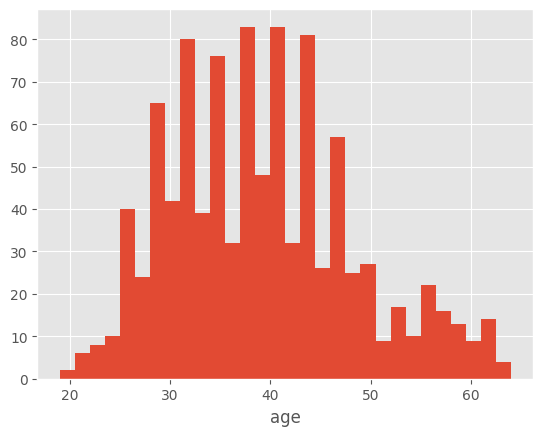

In [11]:
#Univariate
df['age'].hist(bins=30)
plt.xlabel('age')

In [12]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [13]:
# dropping columns that are not necessary for prediction  
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',  
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']  
df.drop(to_drop, inplace = True, axis = 1)  
df.head() 

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [14]:
df.isna().sum()

months_as_customer              0
age                             0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
fraud_reported                  0
dtype: int64

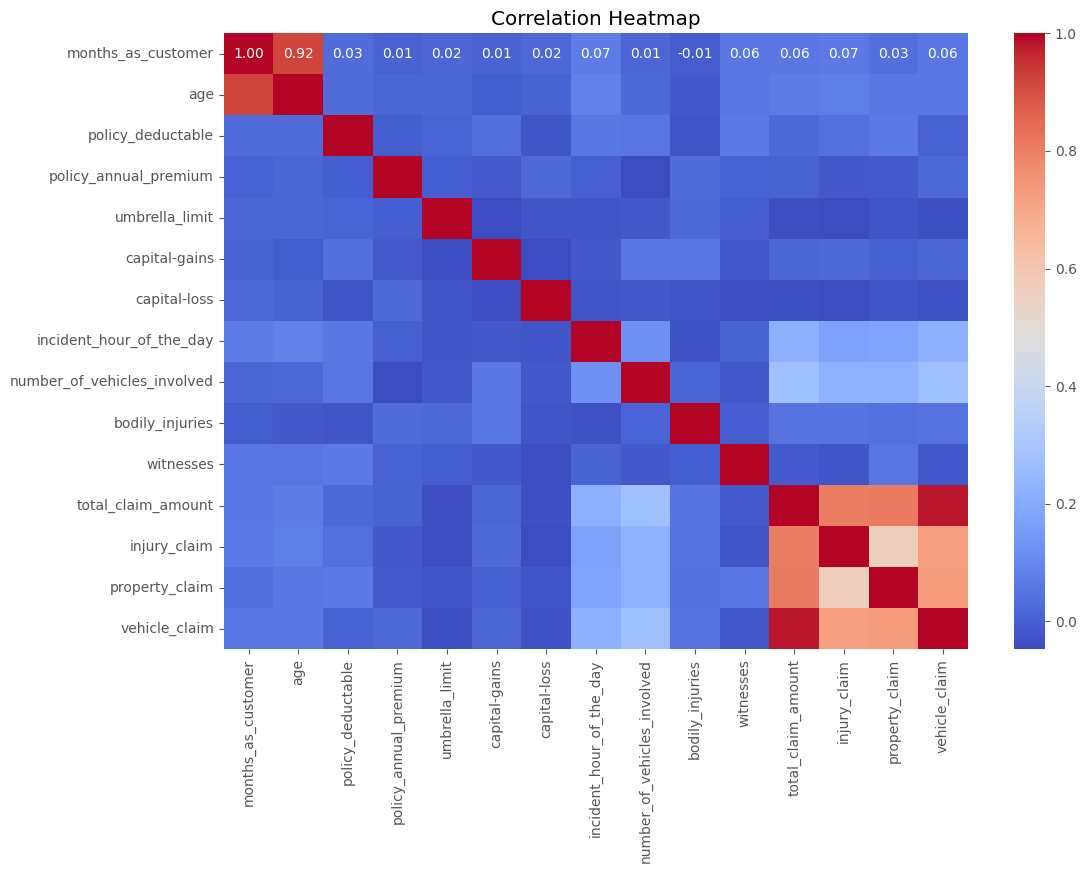

In [15]:
# Compute the correlation matrix
numeric_data = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [16]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [17]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [53]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df['policy_csl'] = le1.fit_transform(df['policy_csl'])
le2 = LabelEncoder()
df['insured_sex'] = le2.fit_transform(df['insured_sex'])
le3 = LabelEncoder()
df['insured_education_level'] = le3.fit_transform(df['insured_education_level'])
le4 = LabelEncoder()
df['insured_occupation'] = le4.fit_transform(df['insured_occupation'])
le5 = LabelEncoder()
df['insured_relationship'] = le5.fit_transform(df['insured_relationship'])
le6 = LabelEncoder()
df['incident_type'] = le6.fit_transform(df['incident_type'])
le7 = LabelEncoder()
df['collision_type'] = le7.fit_transform(df['collision_type'])
le8 = LabelEncoder()
df['incident_severity'] = le8.fit_transform(df['incident_severity'])
le9 = LabelEncoder()
df['authorities_contacted'] = le9.fit_transform(df['authorities_contacted'])
le10 = LabelEncoder()
df['property_damage'] = le10.fit_transform(df['property_damage'])
le11 = LabelEncoder()
df['police_report_available'] = le11.fit_transform(df['police_report_available'])
fraud = LabelEncoder()
df['fraud_reported']=fraud.fit_transform(df['fraud_reported'])
df.head()


,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1,1000,1406.91,0,1,4,2,0,53300,...,5,1,1,1,2,1,6510,13020,52080,1
1,228,1,2000,1197.22,5000000,1,4,6,2,0,...,8,1,0,0,0,0,780,780,3510,1
2,134,0,2000,1413.14,5000000,0,6,11,3,35100,...,7,3,0,2,3,0,7700,3850,23100,0
3,256,1,2000,1415.74,6000000,0,6,1,4,48900,...,5,1,0,1,2,0,6340,6340,50720,1
4,228,2,1000,1583.91,6000000,1,0,11,4,66000,...,20,1,0,0,1,0,1300,650,4550,0


In [54]:
X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [20]:
cat_df = X.select_dtypes(include = ['object']) 
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO


In [21]:
# printing unique values of each column  
for col in cat_df.columns:  
    print(f"{col}: \n{cat_df[col].unique()}\n")  

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' nan 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [22]:
#extracting the numerical columns  
num_df = X.select_dtypes(include = ['int64'])  
num_df.head()  

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [23]:
#combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,328,1000,0,53300,0,5,1,1,2,6510,...,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,228,2000,5000000,0,0,8,1,0,0,780,...,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,NaN,NO,NO


In [48]:
# from sklearn.preprocessing import LabelEncoder
# le1 = LabelEncoder()
# X['policy_csl'] = le1.fit_transform(X['policy_csl'])
# le2 = LabelEncoder()
# X['insured_sex'] = le2.fit_transform(X['insured_sex'])
# le3 = LabelEncoder()
# X['insured_education_level'] = le3.fit_transform(X['insured_education_level'])
# le4 = LabelEncoder()
# X['insured_occupation'] = le4.fit_transform(X['insured_occupation'])
# le5 = LabelEncoder()
# X['insured_relationship'] = le5.fit_transform(X['insured_relationship'])
# le6 = LabelEncoder()
# X['incident_type'] = le6.fit_transform(X['incident_type'])
# le7 = LabelEncoder()
# X['collision_type'] = le7.fit_transform(X['collision_type'])
# le8 = LabelEncoder()
# X['incident_severity'] = le8.fit_transform(X['incident_severity'])
# le9 = LabelEncoder()
# X['authorities_contacted'] = le9.fit_transform(X['authorities_contacted'])
# le10 = LabelEncoder()
# X['property_damage'] = le10.fit_transform(X['property_damage'])
# le11 = LabelEncoder()
# X['police_report_available'] = le11.fit_transform(X['police_report_available'])
# X.head()


,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,4,2,0,2,2,0,3,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,1,4,6,2,3,1,1,3,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,6,11,3,0,1,1,3,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,6,1,4,2,0,0,3,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,1,0,11,4,3,1,1,4,0,0


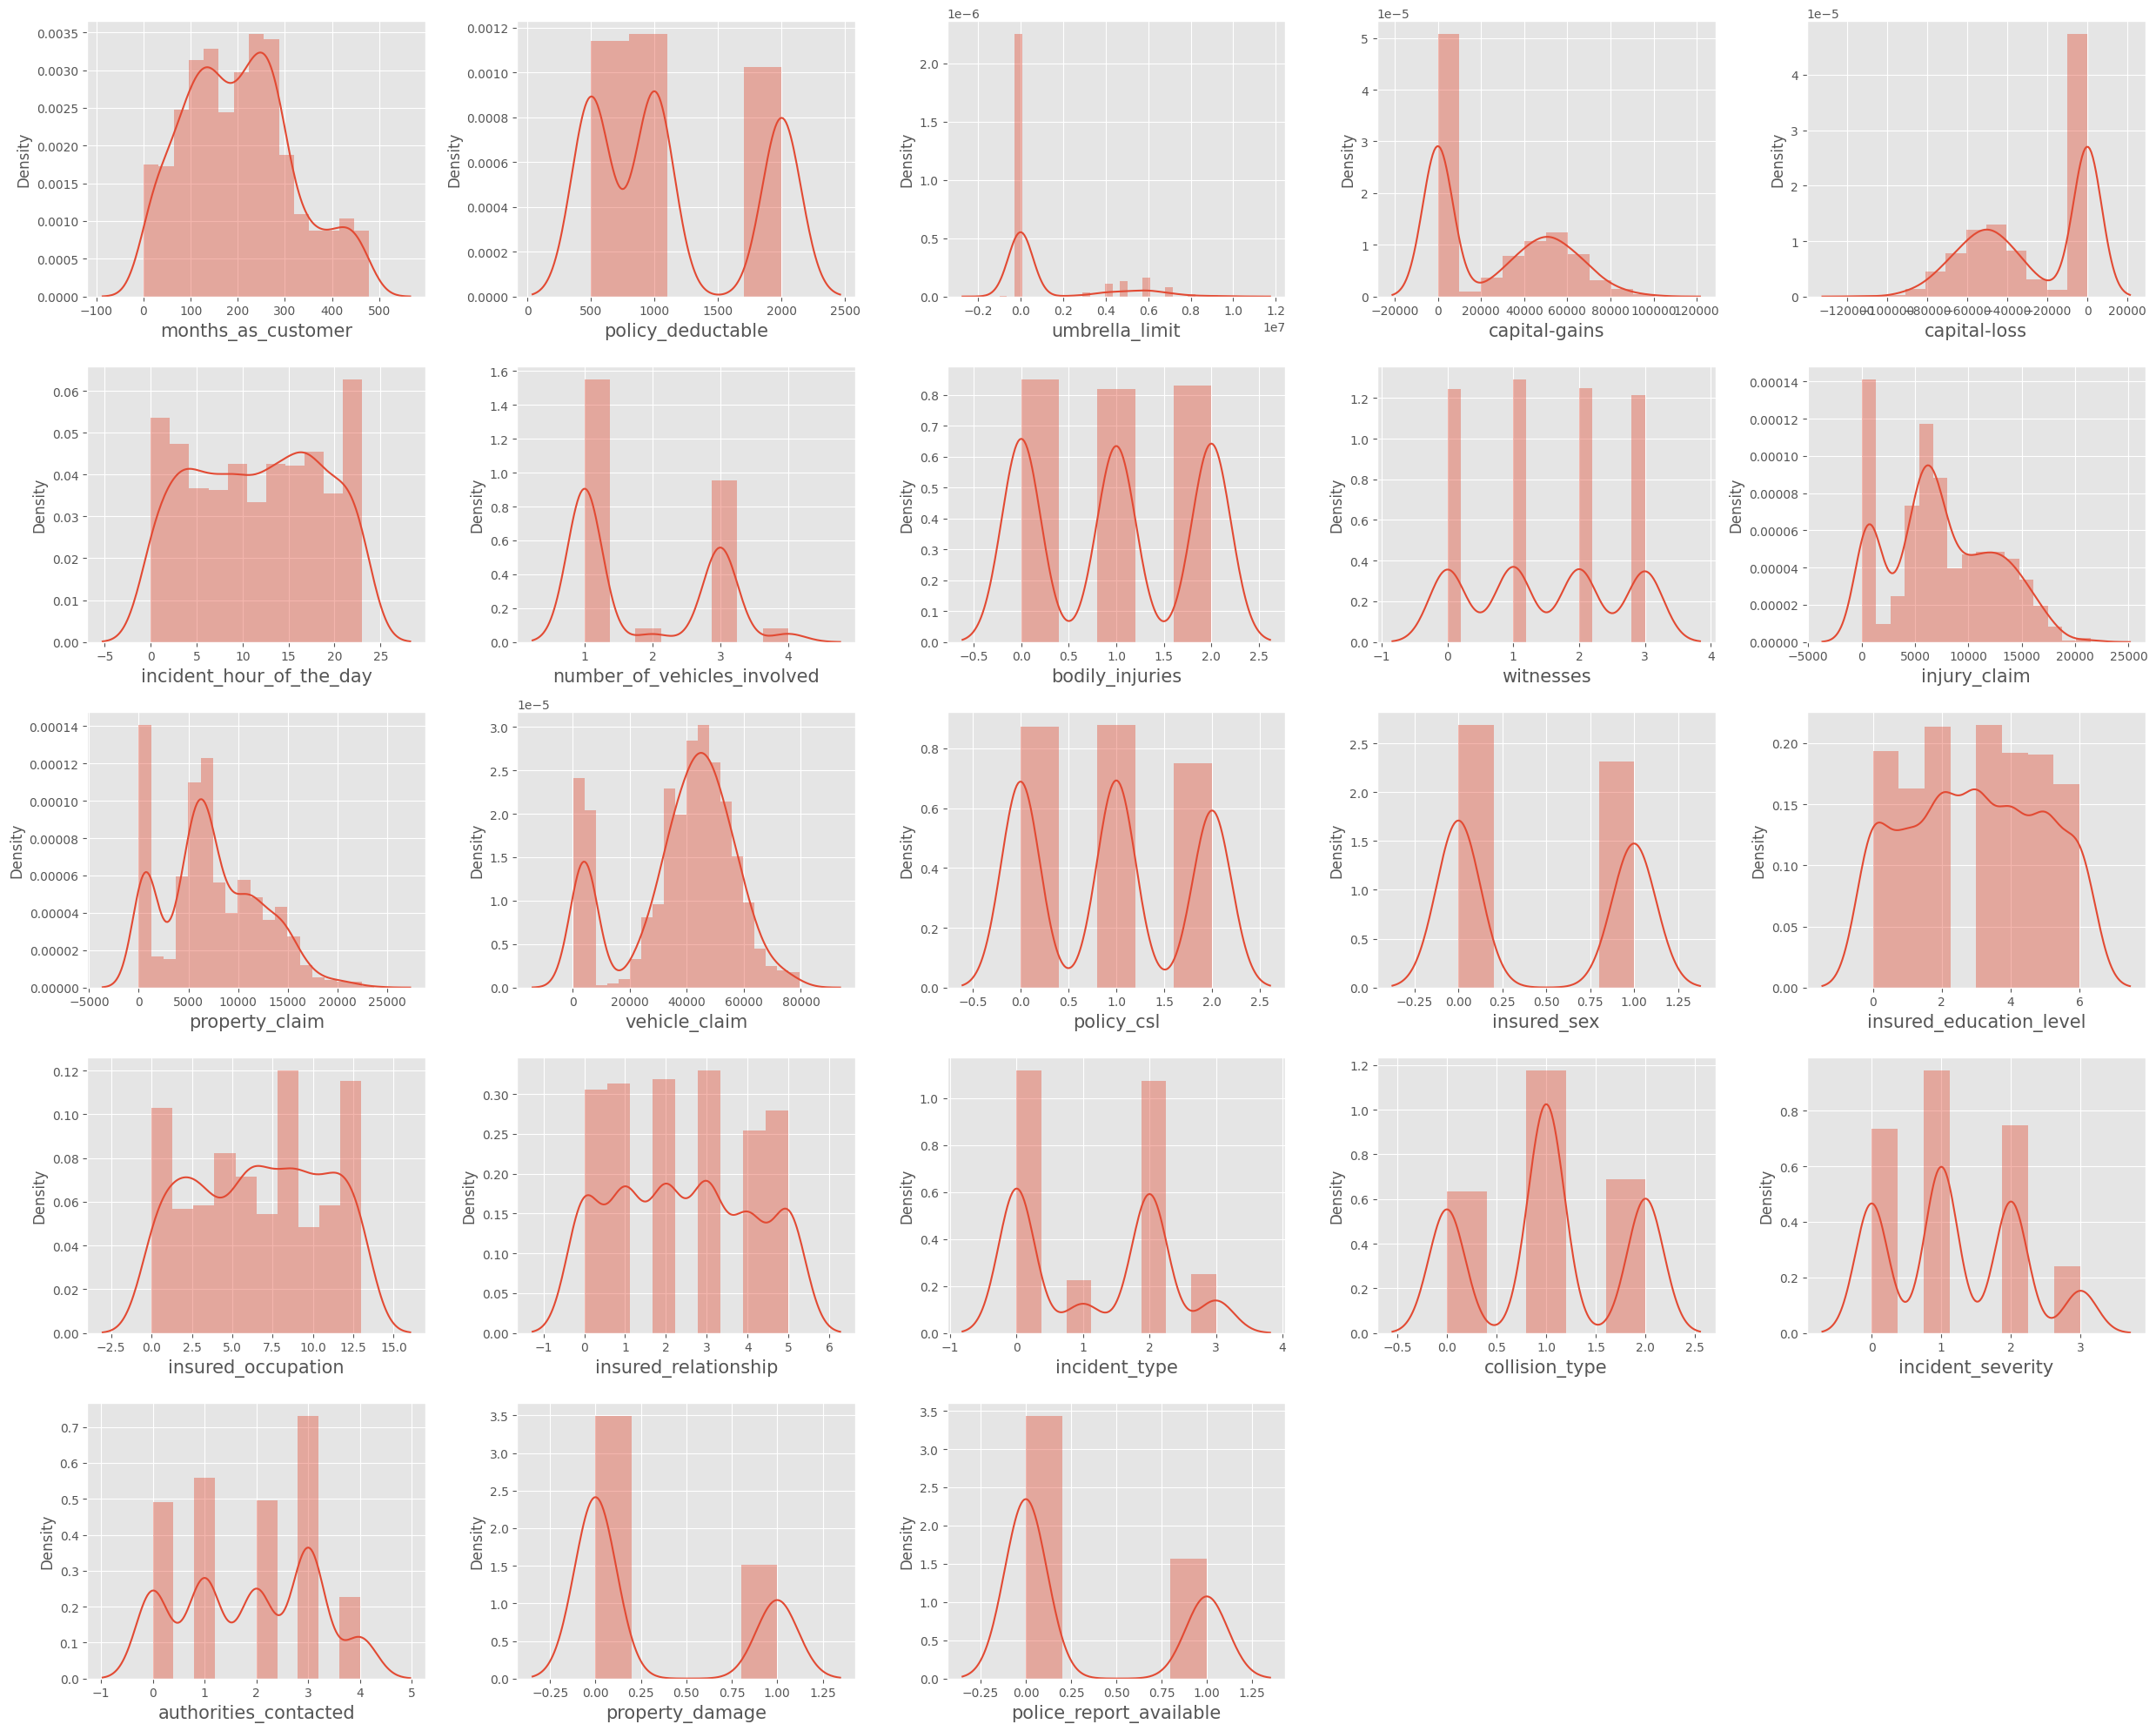

In [25]:
#Data Visualization: Distribution Plots for Features:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

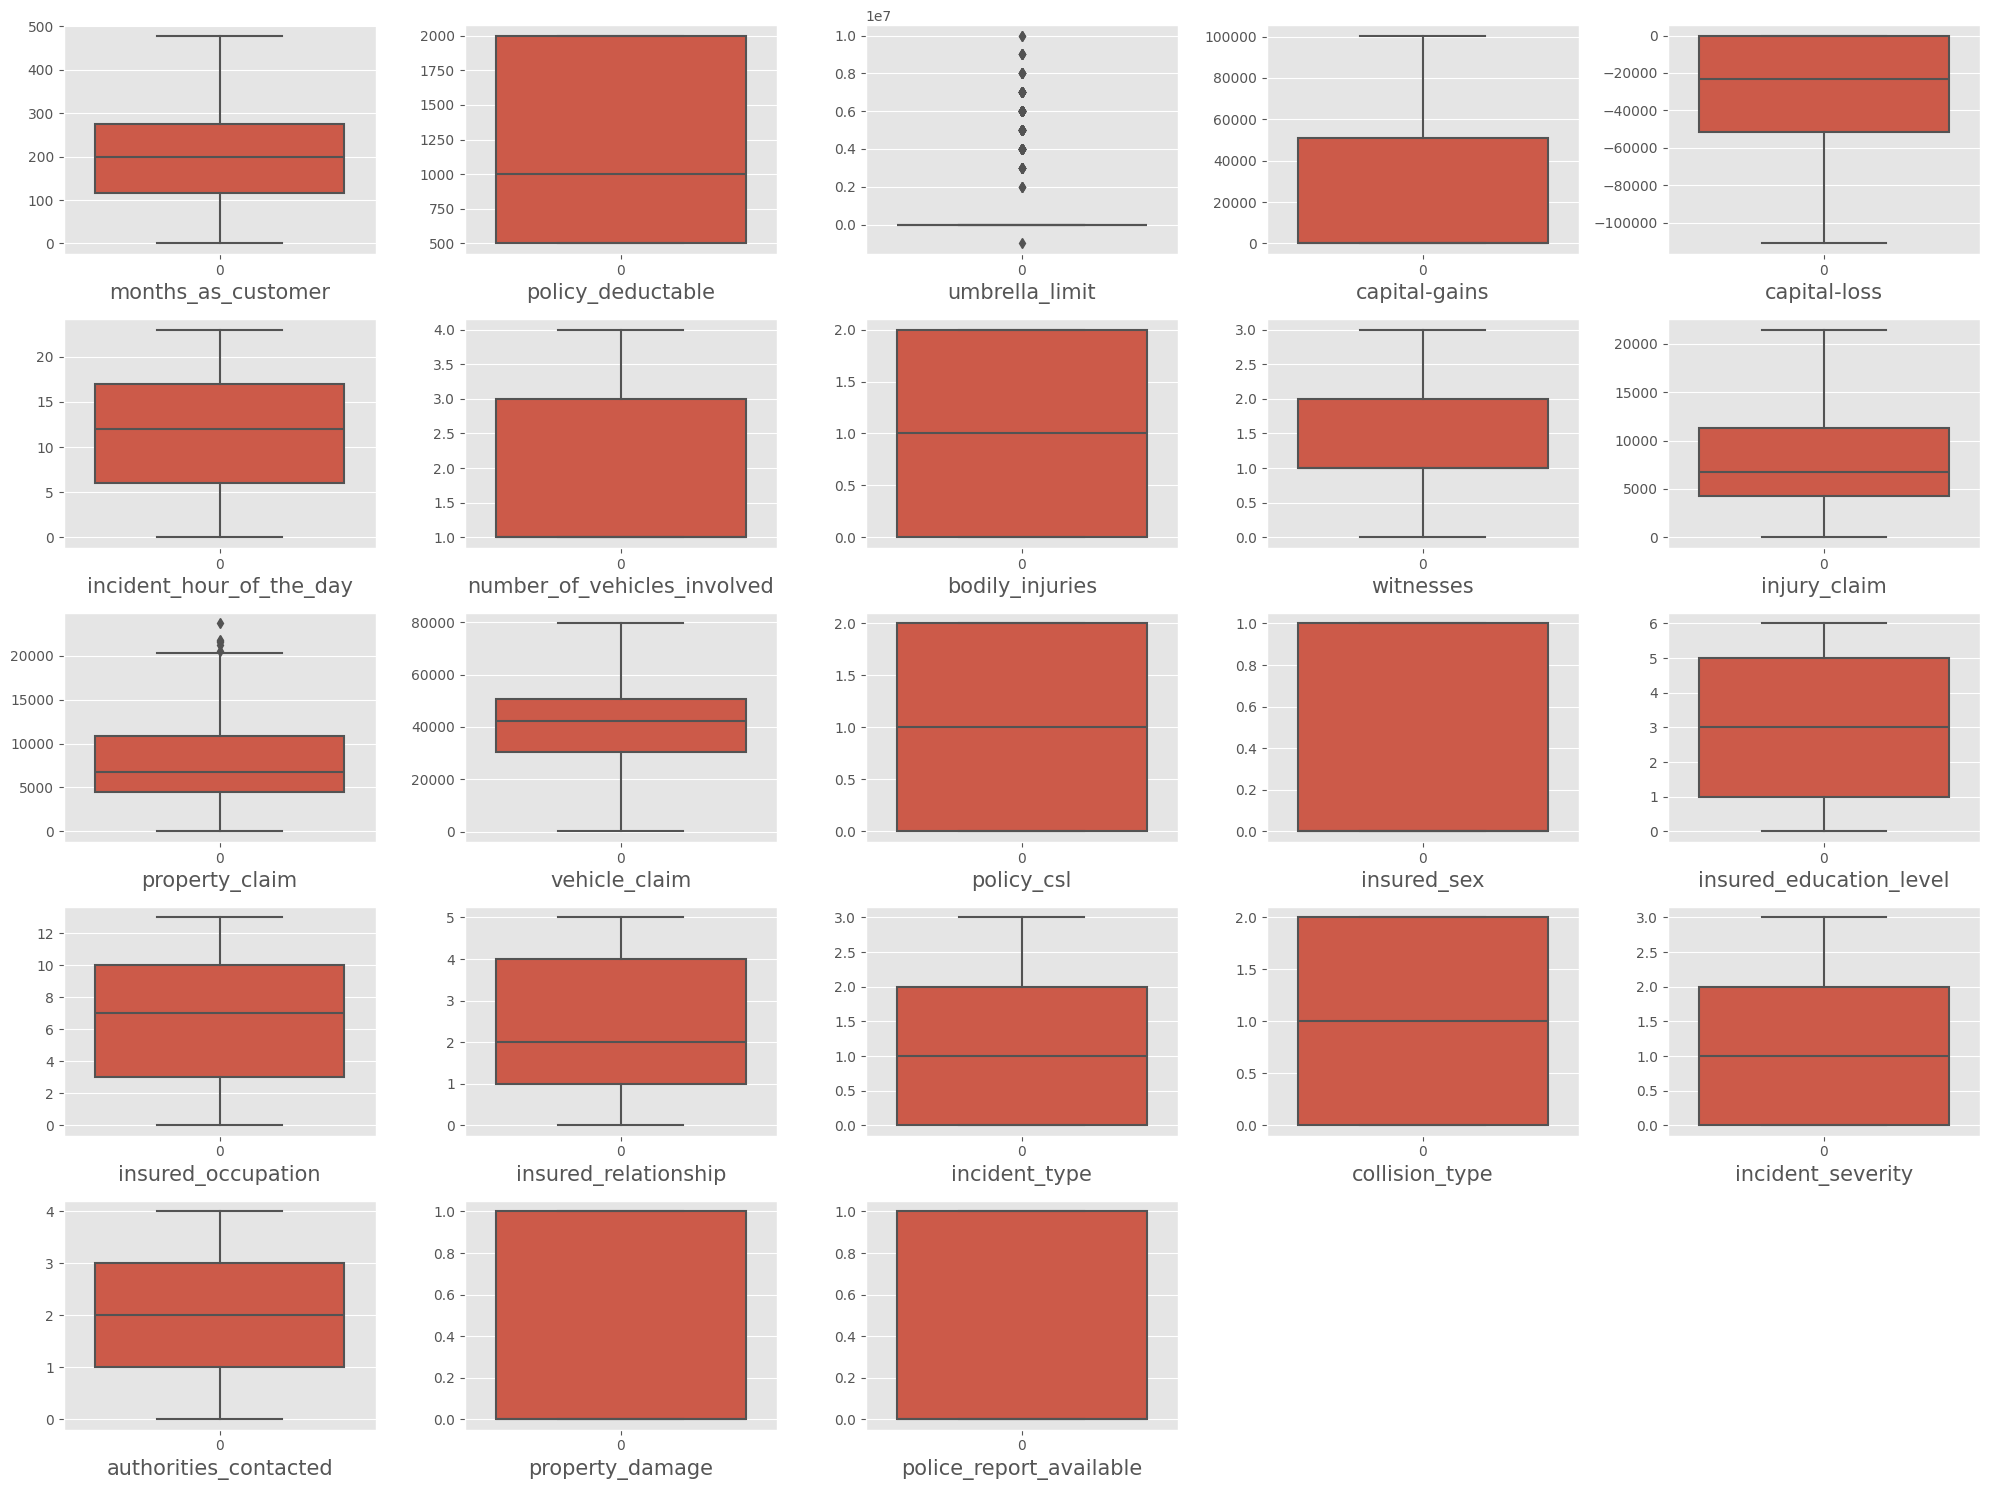

In [40]:
#Data Visualisation: Box plot for feature:Outlier Detection
plt.figure(figsize = (20, 15))  
plotnumber = 1  
  
for col in X.columns:  
    if plotnumber <= 24:  
        ax = plt.subplot(5, 5, plotnumber)  
        sns.boxplot(X[col])  
        plt.xlabel(col, fontsize = 15)  
     
    plotnumber += 1  
plt.tight_layout()  
plt.show()  

In [55]:
# splitting data into a training set and test set  
  
from sklearn.model_selection import train_test_split  
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)  
X_train.head() 

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim
139,124,1,1000,1198.15,0,0,4,7,1,0,...,2,19,3,0,0,2,1,12260,12260,49040
945,412,1,500,1042.56,0,1,2,5,3,0,...,3,19,3,0,0,2,0,15120,7560,45360
620,438,2,500,1119.29,0,0,4,6,0,0,...,3,14,1,0,0,0,0,4070,4070,32560
76,270,2,1000,1038.09,0,0,1,5,0,0,...,1,18,3,0,1,1,1,14900,7450,67050
289,40,2,1000,1248.25,4000000,0,1,11,3,0,...,3,8,1,0,0,2,0,1460,1460,5840


In [56]:
y_train

139    0
945    0
620    1
76     0
289    0
      ..
376    0
835    0
243    0
99     0
970    0
Name: fraud_reported, Length: 750, dtype: int32

In [34]:
num_df= X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',  
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',  
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',  
       'vehicle_claim']]  

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(num_df)

In [36]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
591,0.089770,0.000000,0.090909,0.000000,1.000000,0.695652,0.000000,1.0,0.333333,0.338928,0.921420,0.639326
737,0.334029,0.333333,0.090909,0.612935,1.000000,0.739130,0.666667,1.0,1.000000,0.246154,0.223067,0.530507
853,0.555324,1.000000,0.090909,0.000000,0.557692,0.782609,0.000000,0.5,1.000000,0.353846,0.641318,0.762989
787,0.277662,0.333333,0.090909,0.000000,0.661325,0.826087,0.666667,0.5,0.666667,0.147319,0.133502,0.277393
697,0.302714,1.000000,0.090909,0.000000,0.616453,0.565217,0.000000,1.0,1.000000,0.233566,0.423321,0.503334


In [37]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)  
X_train = pd.concat([scaled_num_df, X_train], axis = 1)  
X_train.head()  

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
591,0.089770,0.000000,0.090909,0.000000,1.000000,0.695652,0.000000,1.0,0.333333,0.338928,...,0,0,1,1,2,1,0,0,0,0
737,0.334029,0.333333,0.090909,0.612935,1.000000,0.739130,0.666667,1.0,1.000000,0.246154,...,0,2,3,0,0,0,2,0,0,1
853,0.555324,1.000000,0.090909,0.000000,0.557692,0.782609,0.000000,0.5,1.000000,0.353846,...,1,0,5,0,2,0,1,1,0,1
787,0.277662,0.333333,0.090909,0.000000,0.661325,0.826087,0.666667,0.5,0.666667,0.147319,...,1,1,0,0,0,0,1,1,0,0
697,0.302714,1.000000,0.090909,0.000000,0.616453,0.565217,0.000000,1.0,1.000000,0.233566,...,0,0,12,4,2,1,0,2,0,0


<Axes: xlabel='incident_type', ylabel='months_as_customer'>

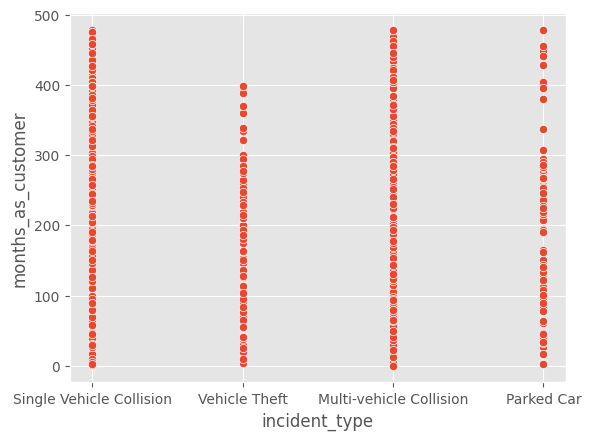

In [38]:
sns.scatterplot(x = "incident_type", y= "months_as_customer", data = df)

In [57]:
from sklearn.neighbors import KNeighborsClassifier  
  
knn = KNeighborsClassifier(n_neighbors = 30)  
knn.fit(X_train, y_train)  
  
y_pred = knn.predict(X_test)  
# accuracy_score, confusion_matrix and classification_report  
  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
  
acc_knn_train = accuracy_score(y_train, knn.predict(X_train))  
acc_knn_test = accuracy_score(y_test, y_pred)  
  
print(f"Training accuracy of KNN is : {acc_knn_train}")  
print(f"Test accuracy of KNN is : {acc_knn_test}")  
  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Training accuracy of KNN is : 0.7426666666666667
Test accuracy of KNN is : 0.784
[[196   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       196
           1       0.00      0.00      0.00        54

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.61      0.78      0.69       250



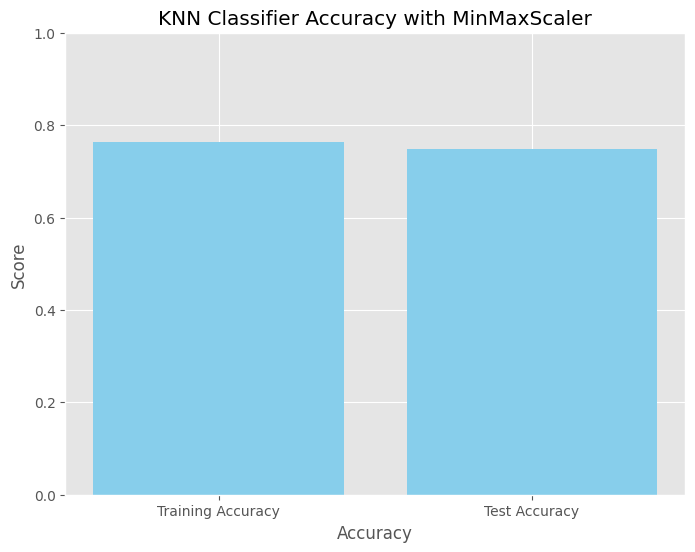

In [40]:
import matplotlib.pyplot as plt

# Define the accuracy scores
accuracy_scores = [acc_knn_train, acc_knn_test]

# Define the labels for the bars
labels = ['Training Accuracy', 'Test Accuracy']

# Plot the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Score')
plt.title('KNN Classifier Accuracy with MinMaxScaler')
plt.ylim(0, 1)  # Limit y-axis from 0 to 1 for accuracy score
plt.show()


In [58]:
from sklearn.tree import DecisionTreeClassifier  
  
dt = DecisionTreeClassifier()  
dt.fit(X_train, y_train)  
  
y_pred = dt.predict(X_test)  
# accuracy_score, confusion_matrix and classification_report  
  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
  
acc_dt_train = accuracy_score(y_train, dt.predict(X_train))  
acc_dt_test = accuracy_score(y_test, y_pred)  
  
print(f"Training accuracy of Decision Tree is : {acc_dt_train}")  
print(f"Test accuracy of Decision Tree is : {acc_dt_test}")  
  
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.684
[[149  47]
 [ 32  22]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       196
           1       0.32      0.41      0.36        54

    accuracy                           0.68       250
   macro avg       0.57      0.58      0.57       250
weighted avg       0.71      0.68      0.70       250



In [59]:
from sklearn.ensemble import RandomForestClassifier  
rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)  
rfc.fit(X_train, y_train)  
  
y_pred = rfc.predict(X_test)  
# accuracy_score, confusion_matrix and classification_report  
  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  
  
acc_rfc_train = accuracy_score(y_train, rfc.predict(X_train))  
acc_rfc_test = accuracy_score(y_test, y_pred)  
  
print(f"Training accuracy of Random Forest is : {acc_rfc_train}")  
print(f"Test accuracy of Random Forest is : {acc_rfc_test}")  
  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

Training accuracy of Random Forest is : 0.9666666666666667
Test accuracy of Random Forest is : 0.812
[[178  18]
 [ 29  25]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       196
           1       0.58      0.46      0.52        54

    accuracy                           0.81       250
   macro avg       0.72      0.69      0.70       250
weighted avg       0.80      0.81      0.80       250



In [61]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Decision Tree', 'Random Forest'],
    'Score' : [acc_knn_test,acc_dt_test, acc_rfc_test]
})
models.sort_values(by = 'Score', ascending = False)
print(models)

           Model  Score
0            KNN  0.784
1  Decision Tree  0.684
2  Random Forest  0.812


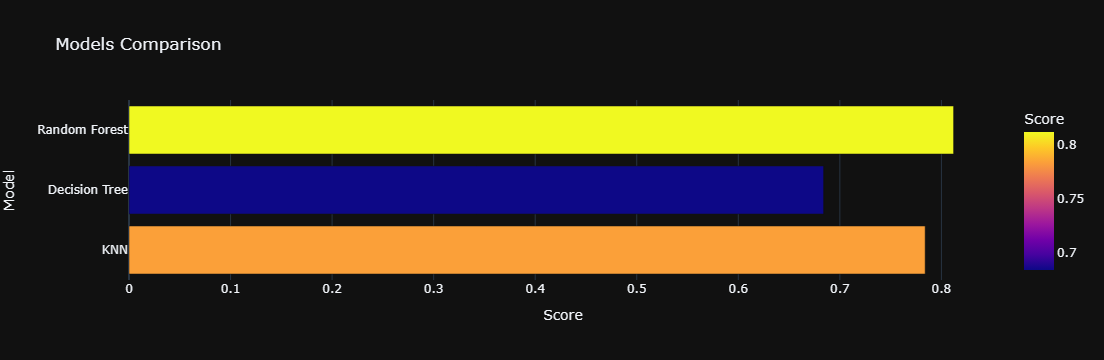

In [62]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

In [ ]:
df.columns